In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
data=load_iris()
print(data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [2]:
df=pd.DataFrame(data=data['data'],columns=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [3]:
##returns species name based on the target value ['0','1','2']
def Species(target):
    if target==0:
        return 'Setosa'
    elif target==1:
        return 'versicolor'
    else:
        return 'virginica'


In [4]:
## add target column to data frame
df['Target']=data['target']
##add Species column to the data frame
df['Species']=df['Target'].apply(Species)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Target Species  
0       0  Setosa  
1       0  Setosa  
2       0  Setosa  
3       0  Setosa  
4       0  Setosa  


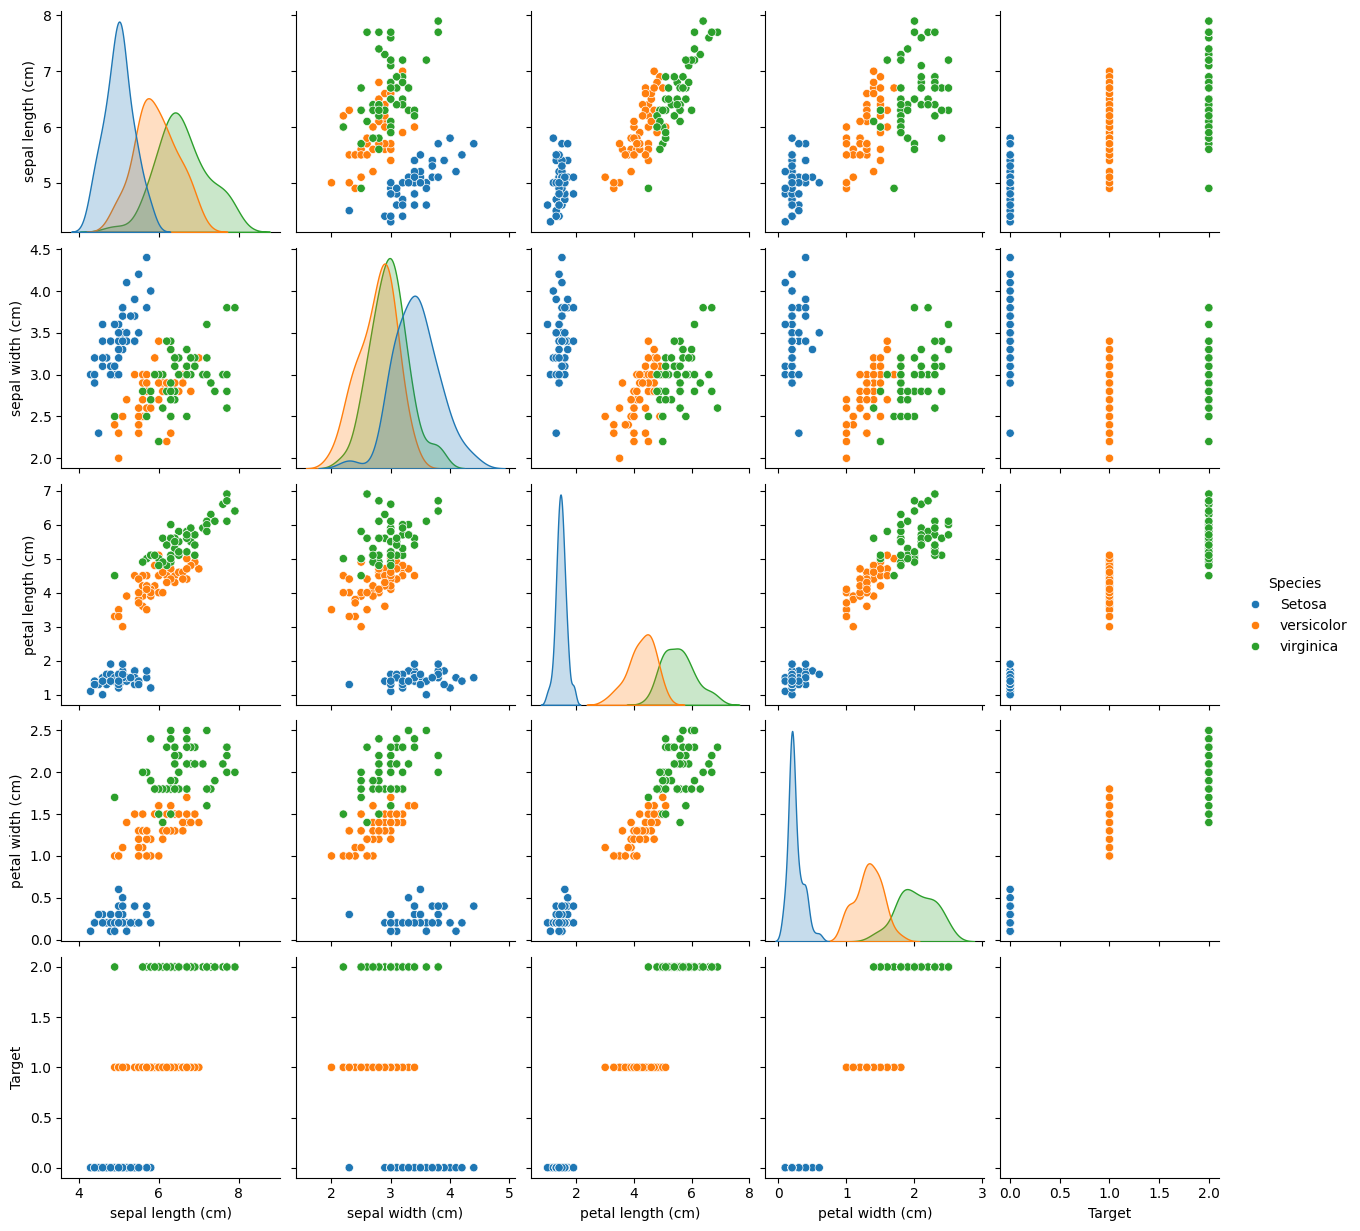

In [5]:
##Split the data in training data and test data
print(sns.pairplot(data=df,hue='Species'))
plt.show()

In [6]:
## since every length and width is correctly correlated with 'target' we can use and data to predict which species target data belongs to
X=df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
y=df['Species']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

1.0


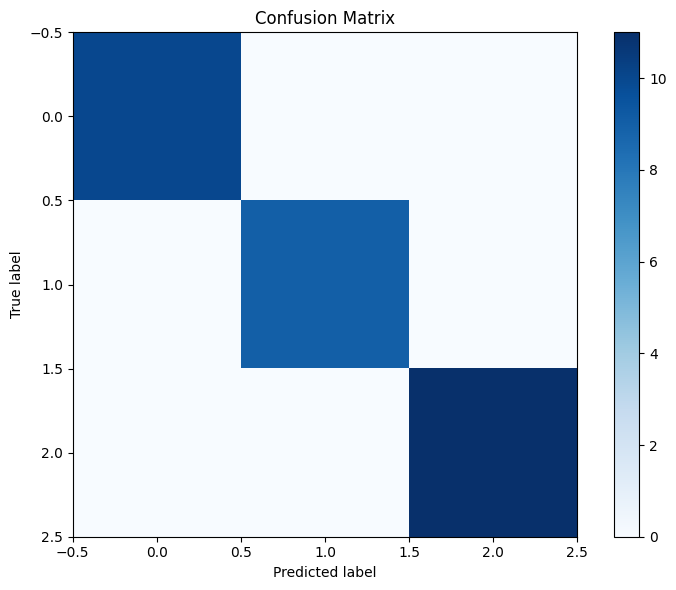

In [7]:
##using SVM
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
##import SVM from sklearn
from sklearn.svm import SVC
model=SVC()
##train the data
model.fit(X_train,y_train)
##predict the output using test data and print report and accuracy of the model
predictions=model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

##plot confusion matrix
conf_matrix=confusion_matrix(y_test,predictions)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



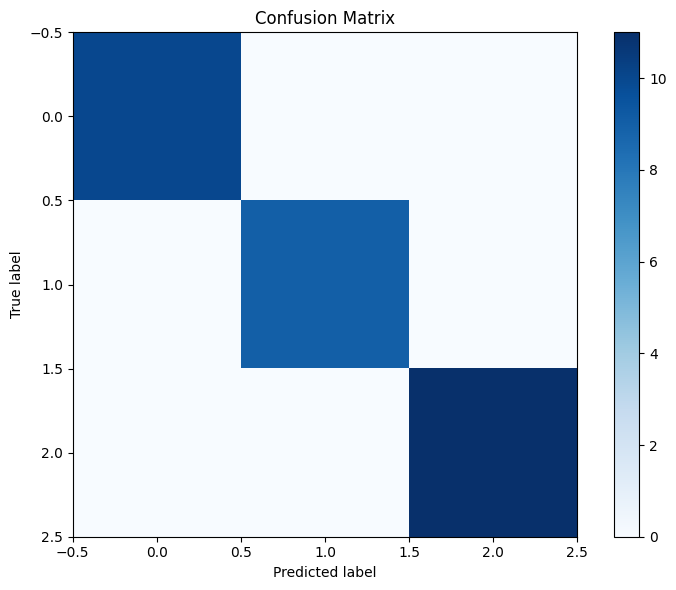

In [8]:
## using k nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2)
##train the model
knn.fit(X_train,y_train)
##predict the output
predictions=knn.predict(X_test)
print(classification_report(y_test,predictions))

##plot confusion matrix
conf_matrix=confusion_matrix(y_test,predictions)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



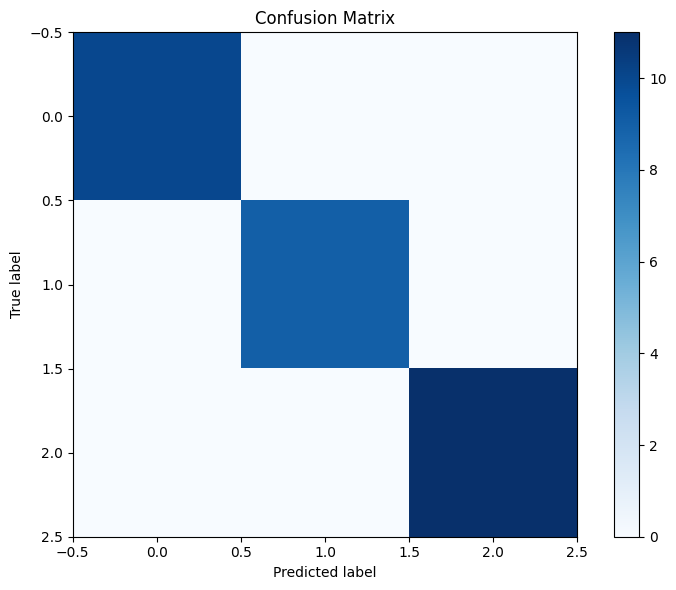

In [9]:
##using logistic classification
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression(random_state=42)
lg.fit(X_train,y_train)
predictions = lg.predict(X_test)
print(classification_report(y_test,predictions))

##plot confusion matrix
conf_matrix=confusion_matrix(y_test,predictions)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



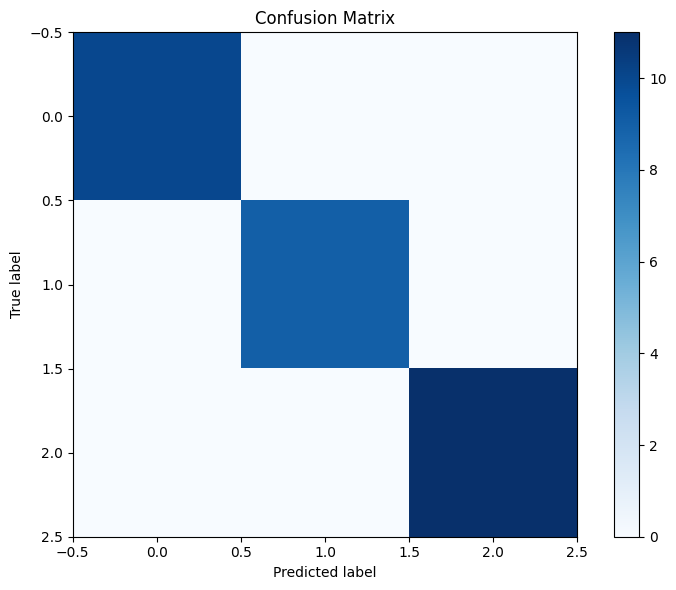

In [10]:
##using LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis(n_components=2)
##train the model
lda.fit(X_train,y_train)
##predict the output
predictions=lda.predict(X_test)
print(classification_report(y_test,predictions))

##plot confusion matrix
conf_matrix=confusion_matrix(y_test,predictions)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()